# NYC Income Dataset Cleaning and Data Exploration

### Methods

In [158]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Loading Data

In [159]:
# load data

df = pd.read_csv("Datasets/IncomeData/Condo_Income_Data.csv")
df.head()

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012
2,1-00015-7501,17 BATTERY PLACE,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,16609710,3668467.0,12941243,93405000.0,2012
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012


In [160]:
# Pre-cleaned shape for the dataset

df.shape

(22073, 12)

### Cleaning Missing values from dataset

In [161]:
# Count of all missing values in the dataset

df.isna().sum()

Boro-Block-Lot              0
Address                     0
Neighborhood                0
Building Classification     0
Total Units                 0
Year Built                 73
Gross SqFt                  0
Estimated Gross Income      0
Estimated Expense           1
Net Operating Income        0
Full Market Value           2
Report Year                 0
dtype: int64

In [162]:
# A look at some of the rows with missing data

df[df["Year Built"].isna()].head(5)

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
2,1-00015-7501,17 BATTERY PLACE,FINANCIAL,RR-CONDOMINIUM,500,NaN,554174,16609710,3668467.0,12941243,93405000.0,2012
1470,2-04248-7501,2013 COLONIAL AVENUE,SCHUYLERVILLE/PELHAM BAY,R4-CONDOMINIUM,11,NaN,10033,150194,66218.0,83976,562999.0,2012
1518,3-00108-7501,189 BRIDGE STREET,DOWNTOWN-METROTECH,R4-CONDOMINIUM,59,NaN,54200,1456354,525198.0,931156,7029991.0,2012
1525,3-00179-7505,457 ATLANTIC AVENUE,BOERUM HILL,R4-CONDOMINIUM,21,NaN,21046,447228,115963.0,331265,2422001.0,2012
1538,3-00249-7502,166 MONTAGUE STREET,BROOKLYN HEIGHTS,R4-CONDOMINIUM,24,NaN,43181,936596,310903.0,625693,4726058.0,2012


In [163]:
# Shared Addresses

df[df["Address"] == "17 BATTERY PLACE"].shape[0]

3

In [164]:
# Dropping rows with missing values

df.dropna(axis=0, inplace = True)
df.shape

(21997, 12)

### Visualization for the Estimated Gross income depending on the neighborhood

In [165]:
df.groupby('Neighborhood')['Estimated Gross Income'].mean().reset_index()

,Neighborhood,Estimated Gross Income
0,15TH Q QUEENS,9.883220e+05
1,2999,2.352890e+07
2,30TH Q BROOKLYN,1.400790e+06
3,50TH Q BROOKLYN,1.496653e+06
4,5TH Q BROOKLYN,5.087285e+05
...,...,...
175,WILLIAMSBURG-SOUTH,1.114293e+06
176,WINDSOR TERRACE,4.526293e+05
177,WOODHAVEN,3.179105e+05
178,WOODSIDE,8.550693e+05


/var/folders/wp/xyxt5q0j54nd6vp96_t5n9r40000gn/T/ipykernel_62100/1449461938.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(labels)


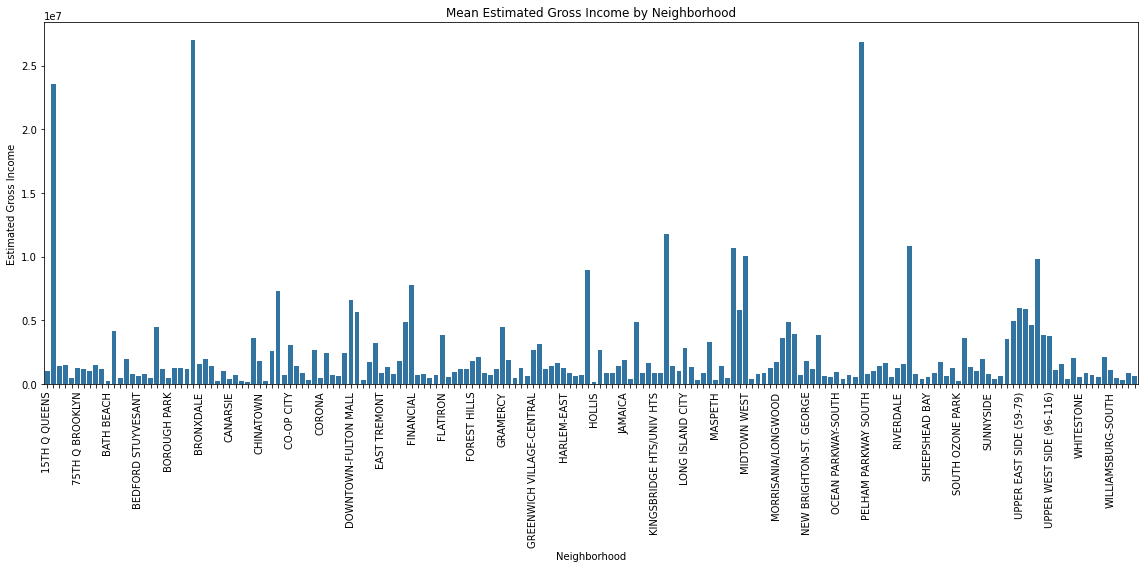

In [166]:
mean_income_by_neighborhood = df.groupby('Neighborhood')['Estimated Gross Income'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(x='Neighborhood', y='Estimated Gross Income', data=mean_income_by_neighborhood)

plt.xticks(rotation=90)

labels = plt.gca().get_xticklabels()
interval = 5
for i in range(len(labels)):
    if i % interval != 0:
        labels[i] = ''
plt.gca().set_xticklabels(labels)

plt.title('Mean Estimated Gross Income by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Estimated Gross Income')

plt.tight_layout()
plt.show()

### Exploration of Neighborhoods and Creation of Boroughs field

In [167]:
# Number of Neighborhoods in the dataset

len(np.unique(df["Neighborhood"].values))

180

In [168]:
df["Neighborhood"].value_counts()

Neighborhood
FLUSHING-NORTH             1100
UPPER EAST SIDE (59-79)     884
HARLEM-CENTRAL              791
CHELSEA                     685
BEDFORD STUYVESANT          646
                           ... 
2999                          1
QN04                          1
30TH Q BROOKLYN               1
CASTLE HILL/UNIONPORT         1
ST. ALBANS                    1
Name: count, Length: 180, dtype: int64

### Adding Boro_name field

In [169]:

df["Boro"] = df["Boro-Block-Lot"].str[0]
df.head(5)

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012,1
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012,1
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012,1
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012,1
5,1-00016-7502,320 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5859815,1664053.0,4195762,31677997.0,2012,1


In [170]:
# All 5 boros are in our dataset
# Now we need to map the correct boro to its name

np.unique(df["Boro"].values)

array(['1', '2', '3', '4', '5'], dtype=object)

In [171]:
np.unique(df["Neighborhood"].values)

array(['15TH Q QUEENS', '2999', '30TH Q BROOKLYN', '50TH Q BROOKLYN',
       '5TH Q BROOKLYN', '75TH Q BROOKLYN', '75TH Q QUEENS',
       'ALPHABET CITY', 'ARROCHAR-SHORE ACRES', 'ASTORIA', 'BATH BEACH',
       'BATHGATE', 'BAY RIDGE', 'BAYSIDE', 'BEDFORD PARK/NORWOOD',
       'BEDFORD STUYVESANT', 'BELMONT', 'BENSONHURST', 'BERGEN BEACH',
       'BOERUM HILL', 'BOROUGH PARK', 'BRIARWOOD', 'BRIGHTON BEACH',
       'BRONX PARK', 'BRONX-UNKNOWN', 'BRONXDALE', 'BROOKLYN HEIGHTS',
       'BROWNSVILLE', 'BUSH TERMINAL', 'BUSHWICK', 'CANARSIE',
       'CARROLL GARDENS', 'CASTLE HILL/UNIONPORT', 'CASTLETON CORNERS',
       'CHELSEA', 'CHINATOWN', 'CITY ISLAND', 'CIVIC CENTER', 'CLINTON',
       'CLINTON HILL', 'CO-OP CITY', 'COBBLE HILL', 'COBBLE HILL-WEST',
       'COLLEGE POINT', 'CONEY ISLAND', 'CORONA', 'CROTONA PARK',
       'CROWN HEIGHTS', 'DONGAN HILLS', 'DOWNTOWN-FULTON FERRY',
       'DOWNTOWN-FULTON MALL', 'DOWNTOWN-METROTECH', 'DYKER HEIGHTS',
       'EAST ELMHURST', 'EAST NEW YOR

In [172]:
df[df["Neighborhood"] == "BERGEN BEACH"].head(1)

# Boro 3 is Brooklyn

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro
2362,3-08374-7505,1930 BERGEN AVENUE,BERGEN BEACH,R4-CONDOMINIUM,208,2005.0,247998,4082047,1780626.0,2301421,15862970.0,2012,3


In [173]:
df[df["Neighborhood"] == "ASTORIA"].head(1)

# Boro 4 is Queens

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro
2425,4-00503-7502,11 31 AVENUE,ASTORIA,R4-CONDOMINIUM,164,2007.0,63294,2428043,825534.0,1602509,15067960.0,2012,4


In [174]:
df[df["Neighborhood"] == "CLINTON"].head(1)

# Boro 1 is Manhatttan

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro
716,1-01051-7501,420 WEST 42 STREET,CLINTON,RR-CONDOMINIUM,262,2000.0,245000,7943596,2943824.0,4999772,38683000.0,2012,1


In [175]:
df[df["Neighborhood"] == "BATHGATE"].head(1)

# Boro 2 is Bronx

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro
4313,2-02929-7501,3952 3 AVENUE,BATHGATE,RR-CONRENTAL,280,2008.0,291547,3635591,1857154.0,1778437,11283000.0,2013,2


In [176]:
df[df["Neighborhood"] == "GRANT CITY"].head(1)

# Boro 5 is Staten Island

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro
2803,5-03543-7501,175 ZOE STREET,GRANT CITY,R4-CONDOMINIUM,100,1986.0,78903,1305056,600452.0,704604,4861996.0,2012,5


In [177]:
boro_number_to_name = {"1": "MANHATTAN", "2": "BRONX", "3": "BROOKLYN", "4": "QUEENS", "5": "STATEN ISLAND"}

df["BORO_NM"] = df["Boro"].map(boro_number_to_name)

df.head(5)

,Boro-Block-Lot,Address,Neighborhood,Building Classification,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,Boro,BORO_NM
0,1-00007-7501,1 COENTIES SLIP,FINANCIAL,R9-CONDOMINIUM,42,1920.0,36500,1216180,293460.0,922720,7156000.0,2012,1,MANHATTAN
1,1-00008-7501,39 WHITEHALL STREET,FINANCIAL,R4-CONDOMINIUM,78,1985.0,126420,6823366,1638934.0,5184432,39143000.0,2012,1,MANHATTAN
3,1-00015-7502,20 WEST STREET,FINANCIAL,R4-CONDOMINIUM,282,1930.0,249076,8946810,2744818.0,6201992,46825007.0,2012,1,MANHATTAN
4,1-00016-7501,377 RECTOR PLACE,TRIBECA,R4-CONDOMINIUM,239,1985.0,219495,7072129,1169908.0,5902221,44562006.0,2012,1,MANHATTAN
5,1-00016-7502,320 ALBANY STREET,TRIBECA,R4-CONDOMINIUM,133,1986.0,139719,5859815,1664053.0,4195762,31677997.0,2012,1,MANHATTAN


In [178]:
#print(np.unique(df["BORO_NM"].values))
print(df["BORO_NM"].value_counts())

BORO_NM
MANHATTAN        10402
BROOKLYN          6821
QUEENS            3753
BRONX              747
STATEN ISLAND      274
Name: count, dtype: int64


### Look at different Stats based on the Boroughs

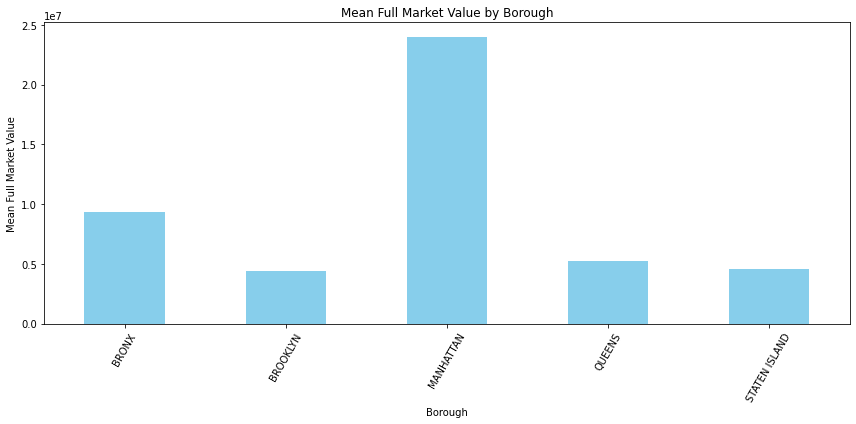

In [179]:
mean_values = df.groupby('BORO_NM')['Full Market Value'].mean()

plt.figure(figsize=(12, 6))
mean_values.plot(kind='bar', color='skyblue')

plt.title('Mean Full Market Value by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean Full Market Value')

plt.xticks(rotation=60)
plt.tight_layout() 

plt.show()

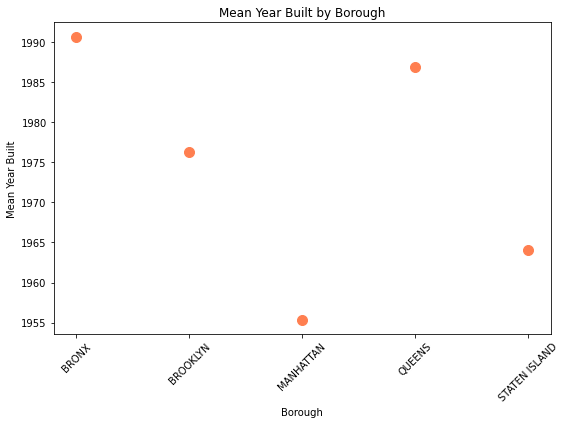

In [180]:
mean_year_built = df.groupby('BORO_NM')['Year Built'].mean()

plt.figure(figsize=(8, 6))

plt.scatter(mean_year_built.index, mean_year_built.values, color='coral', s=100)

plt.title('Mean Year Built by Borough')
plt.xlabel('Borough')
plt.ylabel('Mean Year Built')

plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()

While we can't make any assumptions for whether these variables will actually prove useful for our model, at the very least we can see that their is a clear difference for these variables based on which borough they reside in.

### Further formatting the Neighborhood column to allow for joining with our datasets

In [181]:
np.unique(df["Neighborhood"].values)

array(['15TH Q QUEENS', '2999', '30TH Q BROOKLYN', '50TH Q BROOKLYN',
       '5TH Q BROOKLYN', '75TH Q BROOKLYN', '75TH Q QUEENS',
       'ALPHABET CITY', 'ARROCHAR-SHORE ACRES', 'ASTORIA', 'BATH BEACH',
       'BATHGATE', 'BAY RIDGE', 'BAYSIDE', 'BEDFORD PARK/NORWOOD',
       'BEDFORD STUYVESANT', 'BELMONT', 'BENSONHURST', 'BERGEN BEACH',
       'BOERUM HILL', 'BOROUGH PARK', 'BRIARWOOD', 'BRIGHTON BEACH',
       'BRONX PARK', 'BRONX-UNKNOWN', 'BRONXDALE', 'BROOKLYN HEIGHTS',
       'BROWNSVILLE', 'BUSH TERMINAL', 'BUSHWICK', 'CANARSIE',
       'CARROLL GARDENS', 'CASTLE HILL/UNIONPORT', 'CASTLETON CORNERS',
       'CHELSEA', 'CHINATOWN', 'CITY ISLAND', 'CIVIC CENTER', 'CLINTON',
       'CLINTON HILL', 'CO-OP CITY', 'COBBLE HILL', 'COBBLE HILL-WEST',
       'COLLEGE POINT', 'CONEY ISLAND', 'CORONA', 'CROTONA PARK',
       'CROWN HEIGHTS', 'DONGAN HILLS', 'DOWNTOWN-FULTON FERRY',
       'DOWNTOWN-FULTON MALL', 'DOWNTOWN-METROTECH', 'DYKER HEIGHTS',
       'EAST ELMHURST', 'EAST NEW YOR

In [182]:
df_modelling = pd.read_csv("Datasets/AirbnbData/ModelingData.csv")
unique_modelling_names = np.unique(df_modelling["neighbourhood_cleansed"].values)

In [183]:
sub_areas = ["East", "West", "Upper", "Central", "North", "South", "Lower"]
districts = ["Financial", "Flatiron"]

manuel_mappings = {"West New Brighton": "West Brighton", "Westchester": "Westchester Square",
                   "Arrochar-Shore Acres": "Arrochar", "Bedford Stuyvesant": "Bedford-Stuyvesant",
                   "Co-Op City": "Co-op City", "Soho": "SoHo"}

manuel_mappings_list = ["West New Brighton", "Westchester", "Arrochar-Shore Acres", "Bedford Stuyvesant",
                        "Co-Op City", "Soho"]


def remove_after_slash(string):
    slash_index = string.find('/')
    
    if slash_index != -1:
        return string[:slash_index]
    else:
        return string


# Function to transform the string
def capitalize_first_letter(string):

    # Make the string all lower case
    string = string.lower()

    # Make first letter of every word Capital, including after "-"
    result = [string[0].upper()]
    for i in range(1, len(string)):
        if string[i-1] in (' ', '-', '/'):
            result.append(string[i].upper())
        else:
            result.append(string[i])
    result = ''.join(result)

    # Manuel Mappings are done here

    if result in manuel_mappings_list:
        return manuel_mappings[result]

    # Incase of double name, remove second name i.e first_name/second_name <-- remove second_name

    result = remove_after_slash(result)

    # Remove any sub-area markers from name to generalize
    if len(result) > 6:

        if result[len(result) - 4: len(result)] in sub_areas:
            result = result[: len(result) - 4]
            if result[len(result)-1] in ("-", " "):
                result = result[:len(result)-1]

        elif result[len(result) - 5: len(result)] in sub_areas:
            result = result[: len(result) - 5]
            if result[len(result)-1] in ("-", " "):
                result = result[:len(result)-1]

        elif result[len(result) - 7: len(result)] in sub_areas:
            result = result[: len(result) - 7]
            if result[len(result)-1] in ("-", " "):
                result = result[:len(result)-1]

    if result in districts:
        return result + " District"


    return result


df['Neighborhood_clean'] = df['Neighborhood'].apply(capitalize_first_letter)
unique_income_names = np.unique(df["Neighborhood_clean"].values)

### Testing number of matches between the 2 neighborhood name arrays

In [185]:
common_neighborhoods = np.intersect1d(unique_modelling_names, unique_income_names)
len(common_neighborhoods)
#common_neighborhoods

119

In [186]:
# Find strings in unique_modelling_names that are not in unique_income_names
unique_to_modelling = np.setdiff1d(unique_modelling_names, unique_income_names)

# Find strings in unique_income_names that are not in unique_modelling_names
unique_to_income = np.setdiff1d(unique_income_names, unique_modelling_names)

In [190]:
# Represents the number of neighborhoods that did not have a match in the Income dataset

len(unique_to_modelling)

106

In [191]:
# Represents the number of neighborhoods that did not have a match in the modeling dataset

len(unique_to_income)

46

In [192]:
df["Neighborhood_clean"].value_counts()

Neighborhood_clean
Williamsburg               1460
Harlem                     1237
Flushing                   1165
Upper East Side (59-79)     884
Greenwich Village           818
                           ... 
2999                          1
Qn04                          1
30th Q Brooklyn               1
Castle Hill                   1
St. Albans                    1
Name: count, Length: 165, dtype: int64

### Aggregating the income dataset by Neighborhood

In [193]:
df.columns

Index(['Boro-Block-Lot', 'Address', 'Neighborhood', 'Building Classification',
       'Total Units', 'Year Built', 'Gross SqFt', 'Estimated Gross Income',
       'Estimated Expense', 'Net Operating Income', 'Full Market Value',
       'Report Year', 'Boro', 'BORO_NM', 'Neighborhood_clean'],
      dtype='object')

In [194]:
df_aggregated = df.groupby('Neighborhood_clean').mean(numeric_only =True)
df_aggregated.head(10)

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year
Neighborhood_clean,,,,,,,,
15th Q Queens,38.000000,2015.333333,3.429100e+04,9.883220e+05,2.682137e+05,7.201083e+05,5.809001e+06,2019.000000
2999,2121.000000,1933.000000,1.867373e+06,2.352890e+07,1.445347e+07,9.075433e+06,6.012999e+07,2015.000000
30th Q Brooklyn,64.000000,2016.000000,6.728100e+04,1.400790e+06,5.880360e+05,8.127540e+05,6.263000e+06,2019.000000
50th Q Brooklyn,51.250000,2014.625000,6.178525e+04,1.496653e+06,5.597045e+05,9.369486e+05,7.405876e+06,2019.000000
5th Q Brooklyn,23.500000,2015.500000,1.890550e+04,5.087285e+05,1.455405e+05,3.631880e+05,2.918998e+06,2019.000000
75th Q Brooklyn,27.142857,2013.285714,3.002857e+04,1.242124e+06,3.771424e+05,8.649820e+05,7.020000e+06,2019.000000
75th Q Queens,34.666667,2014.666667,4.698550e+04,1.145716e+06,3.508950e+05,7.948215e+05,6.293500e+06,2019.000000
Alphabet City,26.248649,1966.000000,2.539654e+04,1.041457e+06,3.067551e+05,7.347022e+05,5.754564e+06,2015.545946
Arrochar,102.000000,1987.000000,9.061800e+04,1.456394e+06,7.038074e+05,7.525866e+05,5.356372e+06,2015.500000


### Merging the 2 dataframes on Neighborhood

In [195]:
test_merging = pd.merge(df_aggregated, df_modelling, left_on="Neighborhood_clean", right_on="neighbourhood_cleansed", how="right")

In [196]:
test_merging.head(7)

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,id,host_id,...,coffee,view,average_review_sentiment_score,description_FRES_score,title_sentiment_score,host_about_sentiment_score,neighborhood_overview_score,bookings_per_year,estimated_ococcupancy_rate,log_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,739333866230665371,3013025,...,False,False,0.000000,73.03,0.58590,0.000000,0.0,0.00,0.000000,4.488636
1,18.532075,1990.192453,17624.192453,3.774487e+05,133487.513208,243961.173585,1.828968e+06,2015.558491,572612125615500056,358089614,...,True,False,0.479152,77.53,0.23765,0.000000,0.0,5.04,0.069041,3.806662
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45267941,39162543,...,False,False,0.000000,0.00,0.00000,0.000000,0.0,0.00,0.000000,4.672829
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,838141198693830649,148571080,...,False,False,0.000000,0.00,0.31820,0.403333,0.0,0.00,0.000000,4.941642
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1082660771919357919,394869975,...,False,False,0.000000,85.69,0.00000,0.000000,0.0,0.00,0.000000,5.828946
5,54.000000,2008.000000,73667.000000,1.377573e+06,570287.714286,807285.285714,6.093571e+06,2015.571429,53190949,351763192,...,False,False,0.000000,86.71,0.42150,0.200950,0.0,0.00,0.000000,3.988984
6,23.095975,1984.801858,28405.077399,6.424107e+05,207433.933437,434976.746130,3.346517e+06,2015.667183,1020282701018874374,483056418,...,False,False,0.000000,62.01,0.00000,0.230233,0.0,0.00,0.000000,3.850148


In [197]:
test_merging.shape

(42430, 58)

In [198]:
max(test_merging.isna().sum())

11335

### Replacing missing values with Borough average

In [201]:
# Find the mean values for each of the boroughs

df_brooklyn = df[df["BORO_NM"] == "BROOKLYN"]
df_bronx = df[df["BORO_NM"] == "BRONX"]
df_manhattan = df[df["BORO_NM"] == "MANHATTAN"]
df_queens = df[df["BORO_NM"] == "QUEENS"]
df_staten = df[df["BORO_NM"] == "STATEN ISLAND"]


In [202]:
yb_brooklyn = df_brooklyn["Year Built"].mean()
yb_bronx = df_bronx["Year Built"].mean()
yb_manhattan = df_manhattan["Year Built"].mean()
yb_queens = df_queens["Year Built"].mean()
yb_staten = df_staten["Year Built"].mean()



def fill_tu(row):
    if pd.isna(row['Year Built']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return yb_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return yb_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return yb_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return yb_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return yb_staten
    return row['Year Built']

test_merging['Year Built'] = test_merging.apply(fill_tu, axis=1)

In [203]:
tu_brooklyn = df_brooklyn["Total Units"].mean()
tu_bronx = df_bronx["Total Units"].mean()
tu_manhattan = df_manhattan["Total Units"].mean()
tu_queens = df_queens["Total Units"].mean()
tu_staten = df_staten["Total Units"].mean()



def fill_tu(row):
    if pd.isna(row['Total Units']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return tu_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return tu_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return tu_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return tu_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return tu_staten
    return row['Total Units']

test_merging['Total Units'] = test_merging.apply(fill_tu, axis=1)

In [204]:
fmv_brooklyn = df_brooklyn["Full Market Value"].mean()
fmv_bronx = df_bronx["Full Market Value"].mean()
fmv_manhattan = df_manhattan["Full Market Value"].mean()
fmv_queens = df_queens["Full Market Value"].mean()
fmv_staten = df_staten["Full Market Value"].mean()



def fill_tu(row):
    if pd.isna(row['Full Market Value']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return fmv_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return fmv_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return fmv_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return fmv_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return fmv_staten
    return row['Total Units']

test_merging['Full Market Value'] = test_merging.apply(fill_tu, axis=1)

In [205]:
gs_brooklyn = df_brooklyn["Gross SqFt"].mean()
gs_bronx = df_bronx["Gross SqFt"].mean()
gs_manhattan = df_manhattan["Gross SqFt"].mean()
gs_queens = df_queens["Gross SqFt"].mean()
gs_staten = df_staten["Gross SqFt"].mean()



def fill_tu(row):
    if pd.isna(row['Gross SqFt']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return gs_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return gs_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return gs_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return gs_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return gs_staten
    return row['Gross SqFt']

test_merging['Gross SqFt'] = test_merging.apply(fill_tu, axis=1)

In [206]:
egi_brooklyn = df_brooklyn["Estimated Gross Income"].mean()
egi_bronx = df_bronx["Estimated Gross Income"].mean()
egi_manhattan = df_manhattan["Estimated Gross Income"].mean()
egi_queens = df_queens["Estimated Gross Income"].mean()
egi_staten = df_staten["Estimated Gross Income"].mean()



def fill_tu(row):
    if pd.isna(row['Estimated Gross Income']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return egi_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return egi_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return egi_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return egi_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return egi_staten
    return row['Estimated Gross Income']

test_merging['Estimated Gross Income'] = test_merging.apply(fill_tu, axis=1)

In [207]:
ee_brooklyn = df_brooklyn["Estimated Expense"].mean()
ee_bronx = df_bronx["Estimated Expense"].mean()
ee_manhattan = df_manhattan["Estimated Expense"].mean()
ee_queens = df_queens["Estimated Expense"].mean()
ee_staten = df_staten["Estimated Expense"].mean()



def fill_tu(row):
    if pd.isna(row['Estimated Expense']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return ee_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return ee_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return ee_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return ee_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return ee_staten
    return row['Estimated Expense']

test_merging['Estimated Expense'] = test_merging.apply(fill_tu, axis=1)

In [208]:
noi_brooklyn = df_brooklyn["Net Operating Income"].mean()
noi_bronx = df_bronx["Net Operating Income"].mean()
noi_manhattan = df_manhattan["Net Operating Income"].mean()
noi_queens = df_queens["Net Operating Income"].mean()
noi_staten = df_staten["Net Operating Income"].mean()



def fill_tu(row):
    if pd.isna(row['Net Operating Income']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return noi_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return noi_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return noi_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return noi_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return noi_staten
    return row['Net Operating Income']

test_merging['Net Operating Income'] = test_merging.apply(fill_tu, axis=1)

In [209]:
ry_brooklyn = df_brooklyn["Report Year"].mean()
ry_bronx = df_bronx["Report Year"].mean()
ry_manhattan = df_manhattan["Report Year"].mean()
ry_queens = df_queens["Report Year"].mean()
ry_staten = df_staten["Report Year"].mean()



def fill_tu(row):
    if pd.isna(row['Report Year']):
        if row['neighbourhood_group_cleansed'] == 'Brooklyn':
            return ry_brooklyn
        elif row['neighbourhood_group_cleansed'] == 'Bronx':
            return ry_bronx 
        elif row['neighbourhood_group_cleansed'] == 'Manhattan':
            return ry_manhattan # Default for other neighborhoods
        elif row['neighbourhood_group_cleansed'] == 'Queens':
            return ry_queens
        elif row['neighbourhood_group_cleansed'] == 'Staten Island':
            return ry_staten
    return row['Report Year']

test_merging['Report Year'] = test_merging.apply(fill_tu, axis=1)

In [210]:
test_merging.head()

,Total Units,Year Built,Gross SqFt,Estimated Gross Income,Estimated Expense,Net Operating Income,Full Market Value,Report Year,id,host_id,...,coffee,view,average_review_sentiment_score,description_FRES_score,title_sentiment_score,host_about_sentiment_score,neighborhood_overview_score,bookings_per_year,estimated_ococcupancy_rate,log_price
0,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,739333866230665371,3013025,...,False,False,0.000000,73.03,0.58590,0.000000,0.0,0.00,0.000000,4.488636
1,18.532075,1990.192453,17624.192453,3.774487e+05,1.334875e+05,2.439612e+05,1.853208e+01,2015.558491,572612125615500056,358089614,...,True,False,0.479152,77.53,0.23765,0.000000,0.0,5.04,0.069041,3.806662
2,181.050870,1990.666667,185795.860776,2.733890e+06,1.407035e+06,1.326855e+06,9.316653e+06,2015.752343,45267941,39162543,...,False,False,0.000000,0.00,0.00000,0.000000,0.0,0.00,0.000000,4.672829
3,89.025476,1955.362911,105179.984234,4.418728e+06,1.352718e+06,3.066010e+06,2.399522e+07,2015.336281,838141198693830649,148571080,...,False,False,0.000000,0.00,0.31820,0.403333,0.0,0.00,0.000000,4.941642
4,33.123882,1976.299663,38825.366808,9.153213e+05,3.368985e+05,5.784228e+05,4.428691e+06,2015.691394,1082660771919357919,394869975,...,False,False,0.000000,85.69,0.00000,0.000000,0.0,0.00,0.000000,5.828946


In [211]:
max(test_merging.isna().sum())

0

In [212]:
test_merging.shape

(42430, 58)

### Export final dataframe into CSV format

In [213]:
# test_merging.to_csv("Merged_modeling_income.csv", index=False)